<div style="background-color:#8e312b; color:#202125; font-size:25px; padding:10px; text-align:center; border-radius:25px;" >Pytorch -  Neural Networks</div>

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim


df =pd.read_csv("/kaggle/input/housesalesprediction/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
pd.set_option("display.max_columns",None)

In [3]:
dff = df.drop(columns={'id','date'})


In [4]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [5]:
print("Shape of the Data : ",dff.shape)

Shape of the Data :  (21613, 19)


In [6]:
dff.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
dff.duplicated().sum()

5

In [8]:
dff = dff.drop_duplicates()
#dff.duplicated().sum()

In [9]:
numeric_columns = dff.select_dtypes(include=["int","float"]).columns
categoric_columns = dff.select_dtypes(include='object').columns
print(len(numeric_columns))

print("Numeric Columns : ",numeric_columns)


19
Numeric Columns :  Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [10]:
x = dff.drop(columns=['price'])
y = dff['price']

In [11]:
x.shape , y.shape

((21608, 18), (21608,))

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)


In [13]:
x = torch.tensor(x, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

In [14]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(18,128)
        self.layer2 = nn.Linear(128,64)
        self.layer3 = nn.Linear(64,1)
        self.relu = nn.ReLU()

    def forward(self,X):
        x = self.relu(self.layer1(X))
        x = self.relu(self.layer2(x))
        x = self.layer3(x)
        return x
        

In [15]:
model = NeuralNetwork()

MSEloss = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)

model

NeuralNetwork(
  (layer1): Linear(in_features=18, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
)

In [16]:
from torch.utils.data import DataLoader, TensorDataset, random_split
train_size = int(0.8 * len(x))
test_size = len(x) - train_size

train_dataset, test_dataset = random_split(TensorDataset(x, y), [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [17]:
torch.manual_seed(123)

epochs = 50
train_loss = []
test_loss = []

for epoch in range(epochs):
    model.train()
    total_train_loss = 0
    for batch_x , batch_y in train_loader:
        optimizer.zero_grad()
        y_pred = model(batch_x)
        loss = MSEloss(y_pred,batch_y)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()
    avg_train_loss = total_train_loss / len(train_loader)
    train_loss.append(avg_train_loss)


    model.eval()

    total_test_loss = 0

    with torch.no_grad():
        for batch_x, batch_y in test_loader:
            y_pred = model(batch_x)
            loss = MSEloss(y_pred,batch_y)
            total_test_loss += loss.item()
    avg_test_loss = total_test_loss / len(test_loader)
    test_loss.append(avg_test_loss)

    
    


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([6])) that is different to the input size (torch.Size([6, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, tar

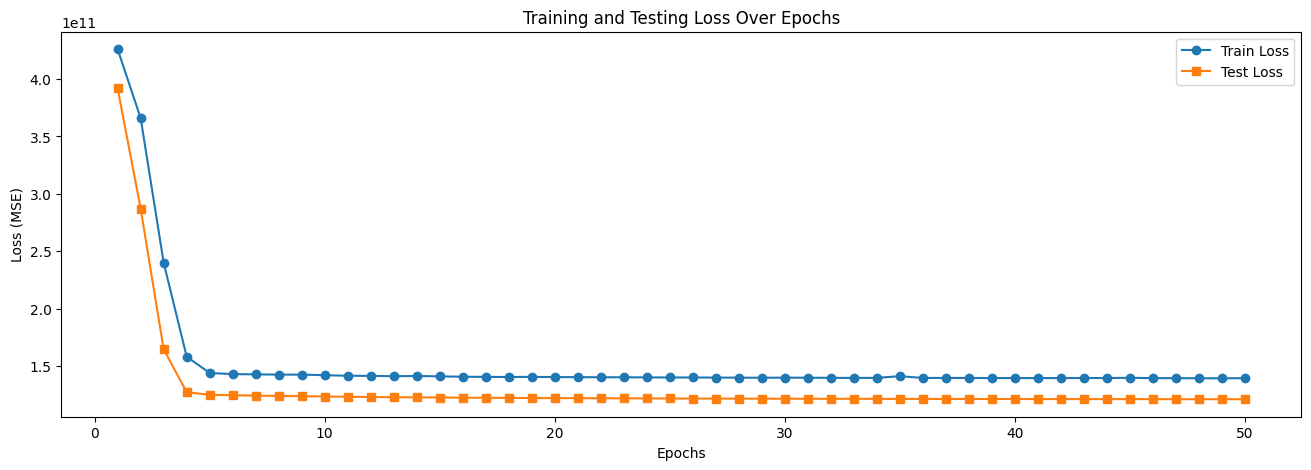

In [18]:
plt.figure(figsize=(16, 5))
plt.plot(range(1, epochs+1), train_loss, label="Train Loss", marker="o")
plt.plot(range(1, epochs+1), test_loss, label="Test Loss", marker="s")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training and Testing Loss Over Epochs")
plt.legend()
plt.show()